# Loading Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Load Dataset

In [4]:
dataset = pd.read_csv("D:/Pantech Solutions/4_SalaryEstimator_K-NearestNeighbour/salary.csv")

# Summarize Dataset

In [5]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [6]:
dataset.shape

(32561, 5)

In [7]:
dataset.size

162805

In [8]:
dataset.ndim

2

In [9]:
dataset.columns

Index(['age', 'education.num', 'capital.gain', 'hours.per.week', 'income'], dtype='object')

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
dataset.describe(include="O").T

,count,unique,top,freq
income,32561,2,<=50K,24720


In [12]:
dataset.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [13]:
dataset.groupby(by="income").size()

income
<=50K    24720
>50K      7841
dtype: int64

In [14]:
dataset.isnull().any()

age               False
education.num     False
capital.gain      False
hours.per.week    False
income            False
dtype: bool

In [15]:
dataset.isnull().sum()

age               0
education.num     0
capital.gain      0
hours.per.week    0
income            0
dtype: int64

# Mapping Salary Data to Binary Value

In [16]:
# income_set = set(dataset['income'])

In [17]:
dataset['income'] = dataset['income'].map({'<=50K': '0','>50K': '1'}).astype(dtype=int)

In [18]:
dataset.head(10)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


In [19]:
dataset.income.dtype

dtype('int32')

# Segregate Dataset into 2 Parts : Independent and Dependent Variable

In [20]:
x = dataset.iloc[:,:-1].values

In [21]:
y = dataset.iloc[:,-1].values

In [22]:
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [23]:
y

array([0, 0, 0, ..., 1, 0, 0])

# Split Database into Training and Testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, shuffle=True)

In [26]:
print(f"Count of x_train : {len(x_train)}")
print(f"Count of x_test  : {len(x_test)}")

Count of x_train : 24420
Count of x_test  : 8141


In [27]:
print(f"Count of y_train : {len(y_train)}")
print(f"Count of y_test  : {len(y_test)}")

Count of y_train : 24420
Count of y_test  : 8141


# Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [30]:
x_train = sc.fit_transform(x_train)

In [31]:
x_test = sc.transform(x_test)

# Finding the best k-value

In [32]:
errors = []
from sklearn.neighbors import KNeighborsClassifier

#Calculating Error for k values between 1 and 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    i_prediction = model.predict(x_test)
    errors.append(np.mean(i_prediction != y_test))

In [33]:
print(list(errors))

[0.24198501412602874, 0.19862424763542563, 0.20353764893747697, 0.19186832084510502, 0.1971502272448102, 0.1874462596732588, 0.19555337182164353, 0.18978012529173321, 0.192728166072964, 0.18769192973836138, 0.1912541456823486, 0.18720058960815625, 0.19014863038938706, 0.18707775457560497, 0.1868320845105024, 0.1837612086967203, 0.18928878516152806, 0.1854808991524383, 0.18560373418498957, 0.18486672398968185, 0.1874462596732588, 0.1851123940547844, 0.1851123940547844, 0.1854808991524383, 0.18535806411988698, 0.1854808991524383, 0.18474388895713056, 0.1868320845105024, 0.1875690947058101, 0.18425254882692543, 0.18462105392457928, 0.18412971379437415, 0.1851123940547844, 0.18498955902223313, 0.1851123940547844, 0.18462105392457928, 0.18486672398968185, 0.18572656921754085, 0.18572656921754085]


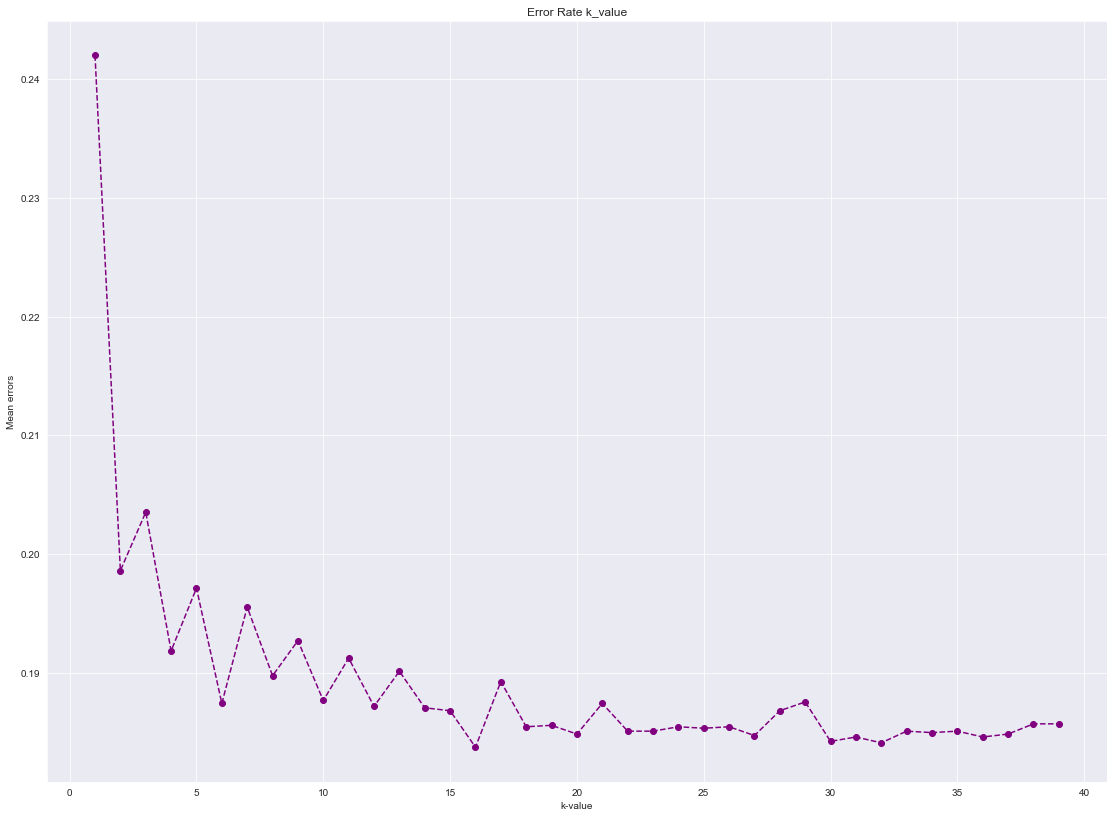

In [34]:
import seaborn as sns
sns.set({"figure.figsize":(19,14)})
plt.plot(range(1,40), errors, color = "purple", ls = "dashed", marker = "o")
plt.xlabel("k-value")
plt.ylabel("Mean errors")
plt.title("Error Rate k_value")
plt.show()

# Training

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model = KNeighborsClassifier(n_neighbors=16, metric="minkowski", p=2)

In [37]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=16)

# Prediction of Income based on Age, Education, Capital Gain & Hours/Week

In [38]:
age = int(input("Enter Age          :  "))
education = int(input("Enter Education    :  "))
cg = int(input("Enter Capital Gain :  "))
h_w = int(input("Enter Hours/Week   :  " ))

newEmp = [[age, education, cg, h_w]]

result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("Employee might got salary more than 50K")
else:
    print("Employee might got salary below or equals 50K")

Enter Age          :  51
Enter Education    :  10
Enter Capital Gain :  0
Enter Hours/Week   :  40
[0]
Employee might got salary below or equals 50K


# Prediction for all Test Data

In [39]:
y_prediction = model.predict(x_test)

In [40]:
y_test.reshape(len(y_test),1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [41]:
y_prediction.reshape(len(y_prediction),1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [42]:
print(np.concatenate((y_test.reshape(len(y_test),1), y_prediction.reshape(len(y_prediction),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Evaluating Model - Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print(f"Confusion Matrix of the Model : \n{confusion_matrix(y_test, y_prediction)}")
print(f"Accuracy of the Model : {accuracy_score(y_test, y_prediction)*100}%")

Confusion Matrix of the Model : 
[[5882  311]
 [1185  763]]
Accuracy of the Model : 81.62387913032796%
